# MONOPOLY

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Dice rolls

In [2]:
def die():
    return random.randint(1,6)

def dice():
    a = random.randint(1,6)
    b = random.randint(1,6)
    return a,b,a+b

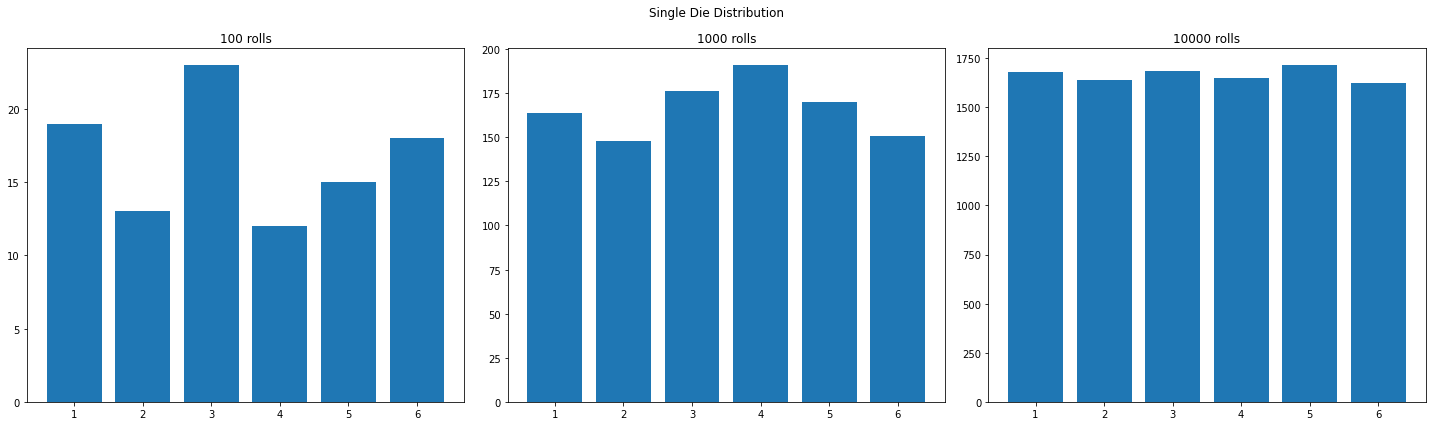

In [3]:
%matplotlib inline

rolls = [0]*6

for i in range(0,100):
    rolls[die()-1] += 1

plt.figure(figsize=(20,6)) 

plt.subplot(1,3,1)
plt.bar([1,2,3,4,5,6], rolls)
plt.title("100 rolls")

rolls[:] = [0]*6
for i in range(0,1000):
    rolls[die()-1] += 1

plt.subplot(1,3,2)
plt.bar([1,2,3,4,5,6], rolls)
plt.title("1000 rolls")


rolls[:] = [0]*6
for i in range(0,10000):
    rolls[die()-1] += 1

plt.subplot(1,3,3)
plt.bar([1,2,3,4,5,6], rolls)
plt.title("10000 rolls")

plt.suptitle('Single Die Distribution')
plt.tight_layout()
plt.show()

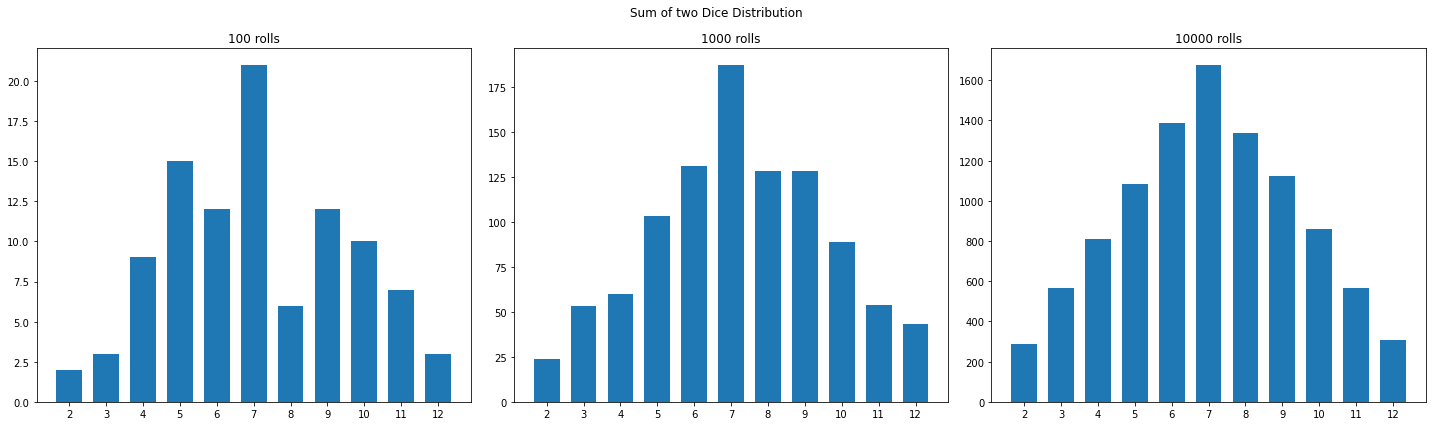

In [4]:
%matplotlib inline

rolls = [0]*11

for i in range(0,100):
    _,_,s = dice()
    rolls[s-2] += 1

plt.figure(figsize=(20,6)) 

plt.subplot(1,3,1)
plt.bar(list(range(2,13)), rolls, width=0.7)
plt.xticks(list(range(2,13)))
plt.title("100 rolls")

rolls[:] = [0]*11
for i in range(0,1000):
    _,_,s = dice()
    rolls[s-2] += 1

plt.subplot(1,3,2)
plt.bar(list(range(2,13)), rolls, width=0.7)
plt.xticks(list(range(2,13)))
plt.title("1000 rolls")



rolls[:] = [0]*11
for i in range(0,10000):
    _,_,s = dice()
    rolls[s-2] += 1

plt.subplot(1,3,3)
plt.bar(list(range(2,13)), rolls, width=0.7)
plt.xticks(list(range(2,13)))
plt.title("10000 rolls")

plt.suptitle('Sum of two Dice Distribution')
plt.tight_layout()
plt.show()

### MONOPOLY Probability and Logic

Normal progression is decided by the sum of the two dice roll. <br>
There are a few "jump spots"
- go to jail
- getting jump cards in community chest
    - 1/16 advance to Go
    - 1/16 go to Jail
- getting jump cards in chance
    - 1/16 advance to Go
    - 1/16 advance to Trafalgar Square
    - 1/16 advance to Mayfair
    - 1/16 advance to Pall Mall
    - 2/16 advance to nearest Station
    - 1/16 advance to nearest Utility
    - 1/16 go back three spaces
    - 1/16 go to Jail
    - 1/16 advance to Kings Cross Station
    

In [5]:
def goto_jail():
    return 10

def community_chest(pos):
    x = random.randint(1,50)
    for i in range(0,x):
        roll = random.randint(1,16)
        
    if roll==1:
        return 0
    elif roll==6:
        return 10
    else:
        return pos
    
def chance(pos):
    x = random.randint(1,50)
    for i in range(0,x):
        roll = random.randint(1,16)

    if roll==1:
        return 0
    
    elif roll==2:
        return 13
    
    elif roll==3:
        return 39
    
    elif roll==4:
        return 24
    
    elif roll==5 or roll==6:
        return advance_station(pos)
    
    elif roll==7:
        return advance_utility(pos)
    
    elif roll==10:
        return (pos-3)
    
    elif roll==11:
        return 10
    
    elif roll==14:
        return 25
    
    else:
        return pos
    
def advance_station(pos):
    stations = [5,15,25,35]
    return stations[((1+(pos-5)//10)%4)]

def advance_utility(pos):
    if pos>=12 and pos<28:
        return 28
    else:
        return 12

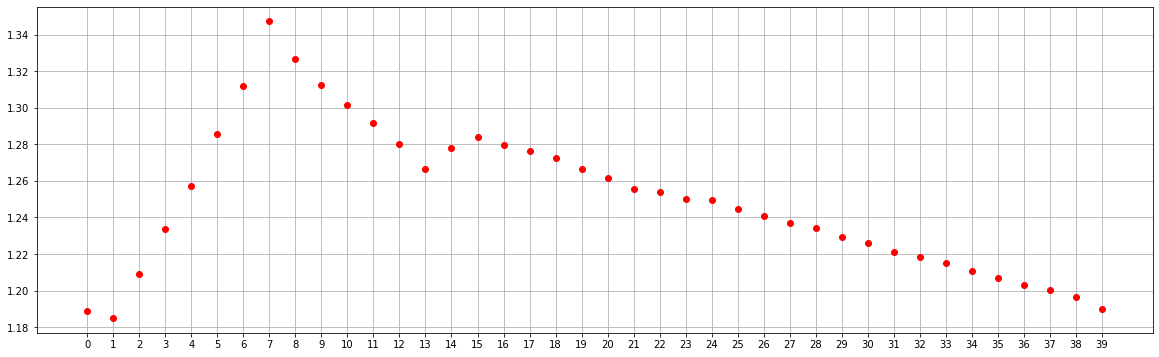

In [6]:
board = [0]*40

n_games = 1000000
n_turns = 50

for games in range(0,n_games):
    curr_pos = 0
    for i in range(0,n_turns):
        _,_,s = dice()
        curr_pos += s
        
        # goto jail
        if(curr_pos == 30):
            #pass
            curr_pos = goto_jail()
        # community cheset
        elif(curr_pos == 2 or curr_pos == 17 or curr_pos == 33):
            #pass
            curr_pos = community_chest(curr_pos)
        # chance
        elif(curr_pos == 7 or curr_pos == 22 or curr_pos == 36):
            #pass
            curr_pos = chance(curr_pos)

        board[curr_pos%40] += 1
        
# on average each position is visited
for i in range(0,40):
    board[i] = board[i]/n_games

plt.figure(figsize=(20,6)) 
plt.plot(list(range(0,40)),board,'ro')
plt.grid()
plt.xticks(list(range(0,40)))
plt.show()
    

50.00000000000001


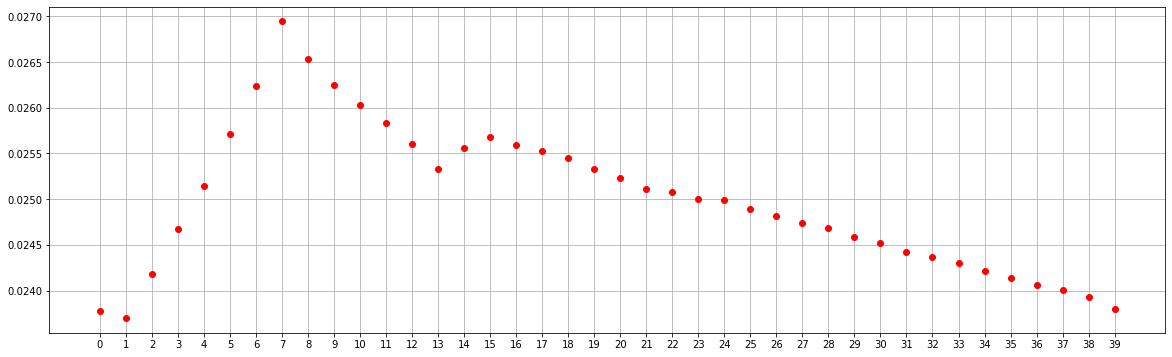

In [7]:
print(sum(board))

board_prob = [0]*40
for i in range(0,40):
    board_prob[i] = board[i]/n_turns
    
plt.figure(figsize=(20,6)) 
plt.plot(list(range(0,40)),board_prob,'ro')
plt.grid()
plt.xticks(list(range(0,40)))
plt.show()

In [8]:
brown = [1,3]
l_blue = [6,8,9]
pink = [11,13,14]
orange = [16,18,19]
red = [21,23,24]
yellow = [26,27,29]
green = [31,32,34]
d_blue = [37,39]

colors = {'brown':brown,'l_blue':l_blue,'pink':pink,'orange':orange,'red':red,'yellow':yellow,'green':green,'d_blue':d_blue}
print(colors)

{'brown': [1, 3], 'l_blue': [6, 8, 9], 'pink': [11, 13, 14], 'orange': [16, 18, 19], 'red': [21, 23, 24], 'yellow': [26, 27, 29], 'green': [31, 32, 34], 'd_blue': [37, 39]}


In [9]:
colors_prob = {'brown':0,'l_blue':0,'pink':0,'orange':0,'red':0,'yellow':0,'green':0,'d_blue':0}

for key,value in colors.items():
    for pos in value:
        colors_prob[key] += board_prob[pos]
        
print(colors_prob)
print(list(colors_prob.keys()), list(colors_prob.values()))

{'brown': 0.04837404000000001, 'l_blue': 0.07901556, 'pink': 0.07672746, 'orange': 0.0763797, 'red': 0.07510212, 'yellow': 0.07413828, 'green': 0.07300145999999999, 'd_blue': 0.04780344}
['brown', 'l_blue', 'pink', 'orange', 'red', 'yellow', 'green', 'd_blue'] [0.04837404000000001, 0.07901556, 0.07672746, 0.0763797, 0.07510212, 0.07413828, 0.07300145999999999, 0.04780344]


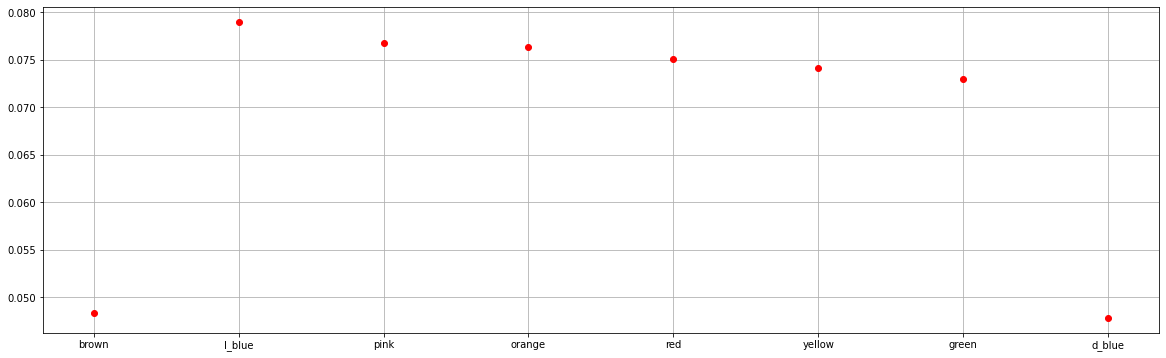

In [10]:
plt.figure(figsize=(20,6)) 
plt.plot(list(range(0,8)),list(colors_prob.values()),'ro')
plt.grid()
plt.xticks(list(range(0,8)), list(colors_prob.keys()))
plt.show()